<a href="https://colab.research.google.com/github/janzaw04/myTestRep/blob/main/%C4%87wiczenia3regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [165]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 100
low=0
high=12
error=10

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(100,) (100,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

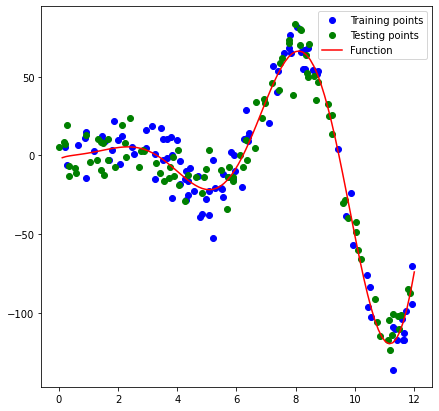

In [166]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

In [167]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla X_test
XX_test_n = XX_test - mean
XX_test_n /= std

# A teraz to samo dla yy_train i yy_test
mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1
# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

In [174]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
# ostatnia warstwa rozmiar 1
from keras import models
from keras import layers

model0 = Sequential()
#.......
model0.add(layers.Dense(1024, activation='relu', input_shape=(1,)))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1024, activation='relu'))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1, activation='linear'))

model0.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

model0.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


In [175]:
history = model0.fit(XX_train_n,yy_train_n, epochs=200, batch_size=512, validation_data=(XX_test_n, yy_test_n))

Epoch 1/200
1/1 [==============================] - 0s 111ms/step - loss: 1.0353 - mse: 1.0353 - val_loss: 0.9048 - val_mse: 0.9048
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 0.8463 - mse: 0.8463 - val_loss: 0.8966 - val_mse: 0.8966
Epoch 3/200
1/1 [==============================] - 0s 21ms/step - loss: 0.7623 - mse: 0.7623 - val_loss: 0.9383 - val_mse: 0.9383
Epoch 4/200
1/1 [==============================] - 0s 21ms/step - loss: 0.7908 - mse: 0.7908 - val_loss: 0.9421 - val_mse: 0.9421
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 0.7934 - mse: 0.7934 - val_loss: 0.8990 - val_mse: 0.8990
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 0.7691 - mse: 0.7691 - val_loss: 0.8481 - val_mse: 0.8481
Epoch 7/200
1/1 [==============================] - 0s 19ms/step - loss: 0.7387 - mse: 0.7387 - val_loss: 0.8122 - val_mse: 0.8122
Epoch 8/200
1/1 [==============================] - 0s 20ms/step - loss: 0.7103 - mse: 0.7

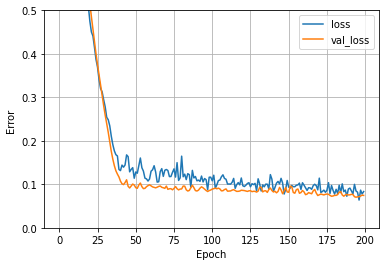

In [176]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [177]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.0745 - mse: 0.0745
loss test data:  0.07450583577156067
mse test data:  0.07450583577156067
4/4 [==============================] - 0s 3ms/step - loss: 0.0727 - mse: 0.0727
loss train data:  0.07272689789533615
mse train data:  0.07272689789533615


<function matplotlib.pyplot.show>

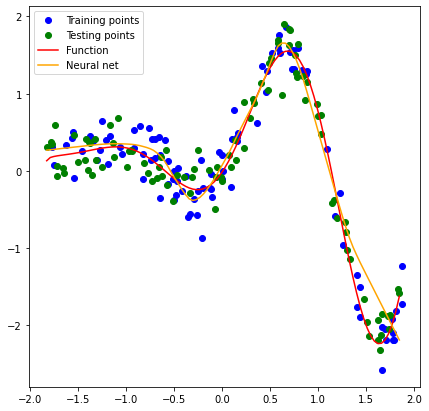

In [178]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

In [179]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()